# MOVING AVERAGE

## Importing all the required libraries 

In [249]:
pwd

'/Users/sumit/AmazonStockAnalysis'

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy
# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [226]:
start = datetime.datetime(2018, 3, 1)
end = datetime.datetime(2022, 3, 31)
df_visa = web.DataReader('V', 'yahoo', start, end) 
visa= df_visa.copy()
visa.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-01,124.000000,119.620003,123.260002,120.400002,8819600.0,117.405746
2018-03-02,120.980003,117.860001,119.089996,120.769997,7581900.0,117.766548
2018-03-05,122.309998,119.440002,120.449997,121.879997,5810200.0,118.848946
2018-03-06,123.239998,120.669998,122.830002,121.059998,7464400.0,118.049339
2018-03-07,122.239998,119.699997,120.029999,121.849998,7254100.0,118.819679


In [227]:
visa.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [228]:
visa.shape

(1030, 6)

In [229]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1030 entries, 2018-03-01 to 2022-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1030 non-null   float64
 1   Low        1030 non-null   float64
 2   Open       1030 non-null   float64
 3   Close      1030 non-null   float64
 4   Volume     1030 non-null   float64
 5   Adj Close  1030 non-null   float64
dtypes: float64(6)
memory usage: 56.3 KB


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

# Moving Average
<br><b>What Is Simple Moving Average (SMA)?</b></br>
<br>A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.</br>
<br>A simple moving average is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend</br>

# Example 
<br> Simple moving average for 5 days will be to calculate stock prices of last 5 days.</br>
<br>Say last 5 days prices were 25.4,25.9,26.5,26.3 and 27.9 then 
<br>Moving Average= Sum of all the last 5 days stock prices/5 </br>
<br>Moving Average= 26.4 </br>

# How Moving Average is useful ?
<br> Moving averages are an important analytical tool used to identify current price trends and the potential for a change in an established trend.</br> 
<br>The simplest use of an SMA in technical analysis is using it to quickly identify if a security is in an uptrend or downtrend.</br>
<br> The longer the time frame for the moving average, the smoother the simple moving average. A shorter-term moving average is more volatile, but its reading is closer to the source data.</br>

In [230]:
visa["20d_sma"]=np.round(visa["Close"].rolling(window=20,center=False).mean(),5)
visa["10d_sma"]=np.round(visa["Close"].rolling(window=10,center=False).mean(),5)
visa["60d_sma"]=np.round(visa["Close"].rolling(window=60,center=False).mean(),5)
visa["30d_sma"]=np.round(visa["Close"].rolling(window=30,center=False).mean(),5)

visa.fillna(0,inplace=True)
visa.tail(10)

,High,Low,Open,Close,Volume,Adj Close,20d_sma,10d_sma,60d_sma,30d_sma
Date,,,,,,,,,,
2022-03-18,219.259995,210.289993,211.699997,219.110001,14620800.0,219.110001,208.2685,202.775,215.86617,214.55333
2022-03-21,218.059998,214.550003,216.339996,217.039993,6101500.0,217.039993,207.9860,205.409,215.85083,214.17500
2022-03-22,219.570007,217.179993,217.839996,218.470001,6259900.0,218.470001,207.8435,208.085,215.88167,213.88533
2022-03-23,217.289993,214.199997,215.300003,214.679993,6008000.0,214.679993,207.7800,209.577,215.83250,213.44333
2022-03-24,217.660004,214.000000,214.990005,217.309998,5487000.0,217.309998,207.7805,211.511,215.82017,212.99133
2022-03-25,218.929993,215.690002,218.419998,218.429993,5051400.0,218.429993,207.7385,213.683,215.82450,212.75267
2022-03-28,220.979996,217.509995,218.500000,220.770004,4316800.0,220.770004,207.9710,215.727,215.87283,212.62200
2022-03-29,228.809998,223.779999,224.839996,228.119995,8032500.0,228.119995,208.9285,217.925,216.06300,212.71467
2022-03-30,226.160004,222.729996,225.839996,223.949997,7084000.0,223.949997,209.7020,219.133,216.10500,212.58567


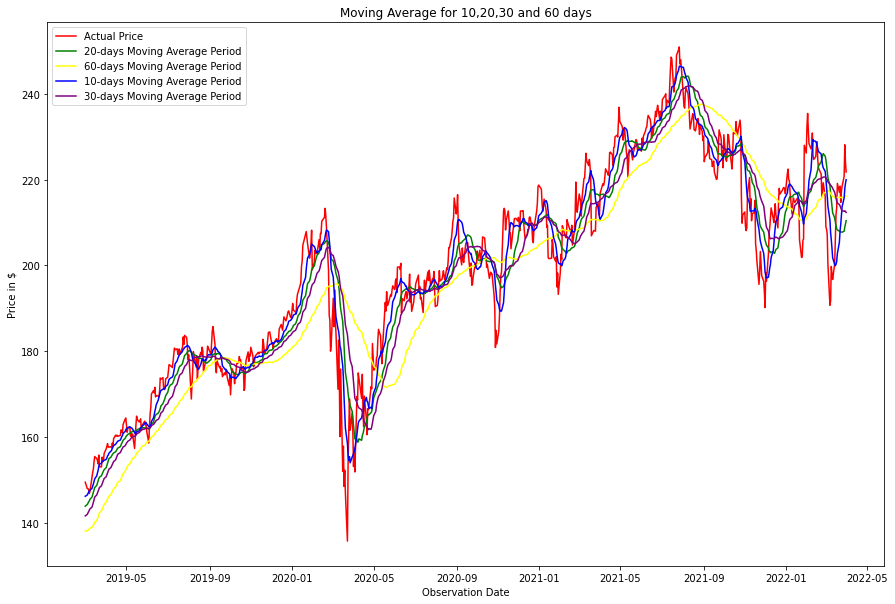

In [231]:
start_date = '2019-03-01'
end_date = '2022-03-31'

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(visa.loc[start_date:end_date, :].index, visa.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(visa.loc[start_date:end_date, :].index, visa.loc[start_date:end_date, '20d_sma'], label = '20-days Moving Average Period', color = 'green')
ax.plot(visa.loc[start_date:end_date, :].index, visa.loc[start_date:end_date, '60d_sma'], label = '60-days Moving Average Period', color = 'yellow')
ax.plot(visa.loc[start_date:end_date, :].index, visa.loc[start_date:end_date, '10d_sma'], label = '10-days Moving Average Period', color = 'blue')
ax.plot(visa.loc[start_date:end_date, :].index, visa.loc[start_date:end_date, '30d_sma'], label = '30-days Moving Average Period', color = 'purple')
ax.legend(loc='best')
ax.set_title('Moving Average for 10,20,30 and 60 days')
ax.set_xlabel('Observation Date')
ax.set_ylabel('Price in $')
fig.savefig('plot.png')

# Observations:
<br>The 20 days may be of analytical benefit to a shorter-term trader since it follows the price more closely and therefore produces less "lag" but may be more volatile.</br>
<br> While the 60 and 120 days which is more smoother curve may be more beneficial to a longer-term trader.</br>

# Exponential Moving Average

<br><b>What Is an Exponential Moving Average (EMA)?</b></br>
<br>An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.</br>
<br>The exponential moving average is also referred to as the exponentially weighted moving average.</br>
<br>An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period </br>


# Usage of EMA
<br>Like all moving averages, this technical indicator is used to produce buy and sell signals based on crossovers and divergences from the historical average.</br>

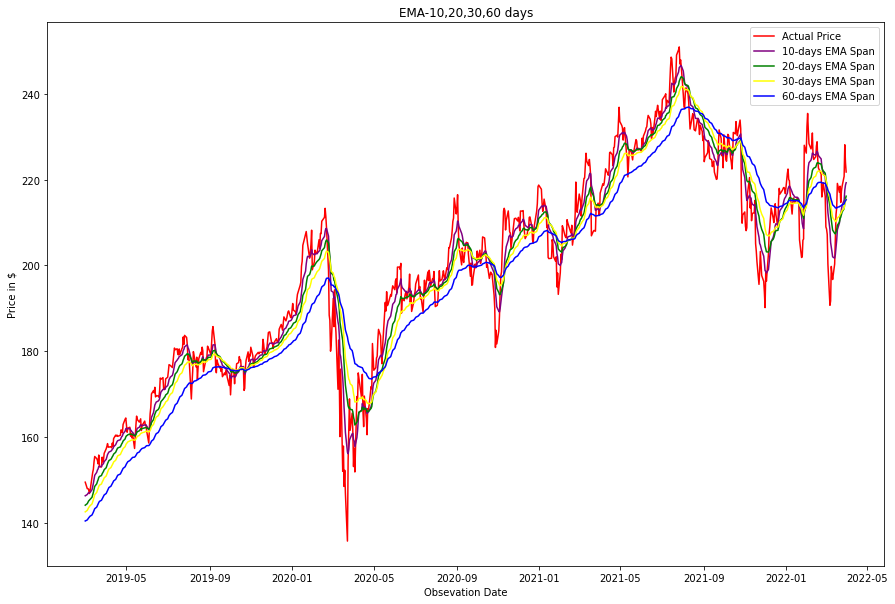

In [232]:
# ewm(exponential weighted) function in pandas which helps to find exponent
ema_10= visa.ewm(span=10, adjust=False).mean()
ema_20= visa.ewm(span=20, adjust=False).mean()
ema_30= visa.ewm(span=30, adjust=False).mean()
ema_60 = visa.ewm(span=60, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(visa.loc[start_date:end_date, :].index, visa.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_10.loc[start_date:end_date, :].index, ema_10.loc[start_date:end_date, 'Close'], label = '10-days EMA Span', color = 'purple')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'green')
ax.plot(ema_30.loc[start_date:end_date, :].index, ema_30.loc[start_date:end_date, 'Close'], label = '30-days EMA Span', color = 'yellow')
ax.plot(ema_60.loc[start_date:end_date, :].index, ema_60.loc[start_date:end_date, 'Close'], label = '60-days EMA Span', color = 'blue')

ax.legend(loc='best')
ax.set_title('EMA-10,20,30,60 days')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')
fig.savefig('plot1.png')

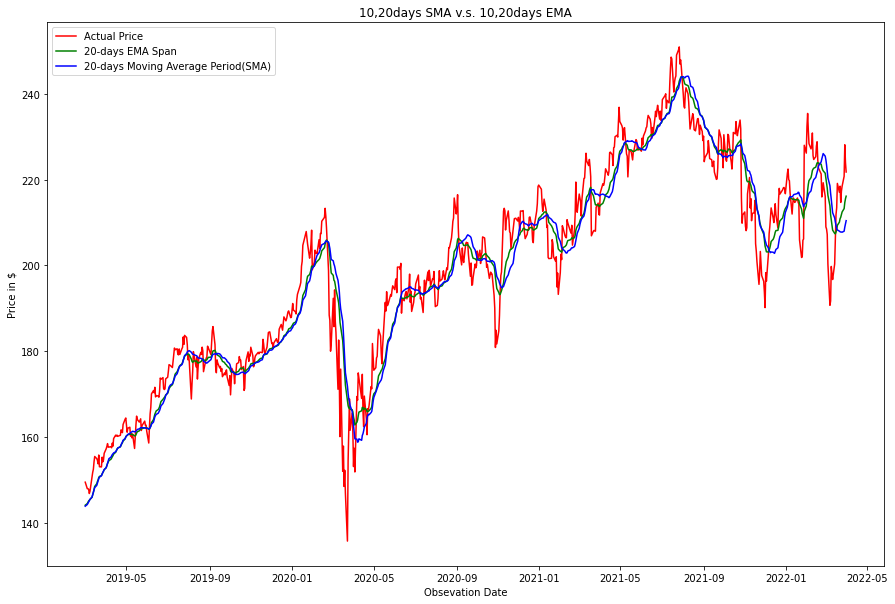

In [233]:
# Checking difference between SMA for 20 days and EMA for 20 days

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(visa.loc[start_date:end_date, :].index, visa.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'green')
#ax.plot(ema_10.loc[start_date:end_date, :].index, ema_10.loc[start_date:end_date, 'Close'], label = '10-days EMA Span', color = 'yellow')
ax.plot(visa.loc[start_date:end_date, :].index, visa.loc[start_date:end_date, '20d_sma'], label = '20-days Moving Average Period(SMA)', color = 'blue')
#ax.plot(visa.loc[start_date:end_date, :].index, visa.loc[start_date:end_date, '10d_sma'], label = '10-days Moving Average Period(SMA)', color = 'black')
ax.legend(loc='best')
ax.set_title('10,20days SMA v.s. 10,20days EMA')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')
fig.savefig('plot2.png')

# Observations
<br>EMA 20 days is closer to Actual than SMA 20 days</br>

In [234]:
visa_new=pd.DataFrame()
visa_new['Actual Close'] = visa['Close']
visa_new['20days EMA Close'] = ema_20['Close']
visa_new.tail(20)

,Actual Close,20days EMA Close
Date,,
2022-03-04,200.289993,216.341204
2022-03-07,190.699997,213.899184
2022-03-08,191.710007,211.785929
2022-03-09,199.759995,210.640602
2022-03-10,197.970001,209.433878
2022-03-11,196.710007,208.222081
2022-03-14,200.330002,207.470454
2022-03-15,206.139999,207.343744
2022-03-16,211.869995,207.774816


In [235]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(visa_new['Actual Close'], visa_new['20days EMA Close']))
rmse

5.733347768396156

In [236]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [237]:
x=visa_new['Actual Close'].tolist()
y=visa_new['20days EMA Close'].tolist()
rsquared(x,y)

0.9730609256149482

<b><br>Buy if actual actual close price cross 20days EMA from below </br></b>
<b><br>Sell if actual close price cross 20 days EMA from above </br></b>

In [238]:
for index, row in visa_new.iterrows():
    if visa_new.loc[index,'Actual Close'] > visa_new.loc[index,'20days EMA Close']:
        visa_new.loc[index,'Signal'] = 1   
    elif visa_new.loc[index,'Actual Close'] < visa_new.loc[index,'20days EMA Close']:
        visa_new.loc[index,'Signal'] = -1   
    else:
        visa_new.loc[index,'Signal'] = 0


In [239]:
visa_new.dropna(axis=0,how='any',inplace=True)
visa_new.head()


,Actual Close,20days EMA Close,Signal
Date,,,
2018-03-01,120.400002,120.400002,0.0
2018-03-02,120.769997,120.435239,1.0
2018-03-05,121.879997,120.572835,1.0
2018-03-06,121.059998,120.619232,1.0
2018-03-07,121.849998,120.736447,1.0


In [240]:
visa_new['Signal']= visa_new['Signal'].shift(1)
visa_new.head(20)

,Actual Close,20days EMA Close,Signal
Date,,,
2018-03-01,120.400002,120.400002,NaN
2018-03-02,120.769997,120.435239,0.0
2018-03-05,121.879997,120.572835,1.0
2018-03-06,121.059998,120.619232,1.0
2018-03-07,121.849998,120.736447,1.0
2018-03-08,122.220001,120.877738,1.0
2018-03-09,124.510002,121.223668,1.0
2018-03-12,124.239998,121.510938,1.0
2018-03-13,123.199997,121.671800,1.0


In [241]:
visa_new['Signal'].value_counts()

 1.0    683
-1.0    345
 0.0      1
Name: Signal, dtype: int64

In [242]:
visa_new

,Actual Close,20days EMA Close,Signal
Date,,,
2018-03-01,120.400002,120.400002,NaN
2018-03-02,120.769997,120.435239,0.0
2018-03-05,121.879997,120.572835,1.0
2018-03-06,121.059998,120.619232,1.0
2018-03-07,121.849998,120.736447,1.0
...,...,...,...
2022-03-25,218.429993,212.446231,1.0
2022-03-28,220.770004,213.238972,1.0
2022-03-29,228.119995,214.656212,1.0


In [243]:
visa_new['Actual Close'].mean()

183.45202916710122

In [244]:
initial_amt = 30000
total_shares = 30
print('Account balance ',initial_amt)
print('Initial number of shares owned ',total_shares)
ini_price = 120.4
avg_price = 183.45
initial_val = initial_amt + ini_price*total_shares#initial amount+total_shares*ini_price

for index, row in visa_new.iterrows():
    if visa_new.loc[index,'Signal'] == 1:
        if (initial_amt - visa_new.loc[index,'Actual Close'])> 0 :
            initial_amt -= visa_new.loc[index,'Actual Close']
            avg_price = ((avg_price*total_shares)+visa_new.loc[index,'Actual Close'])/(total_shares+1)
            total_shares = total_shares + 1;
            visa_new.loc[index,'Action'] = "Buy"
        else:
            visa_new.loc[index,'Action'] = "Buy Alert"         
    elif visa_new.loc[index,'Signal'] == -1:
        if total_shares - 1 > 0 :
            visa_new.loc[index,'Action'] = "Sell"
            avg_price = ((avg_price*total_shares)-visa_new.loc[index,'Actual Close'])/(total_shares-1)
            initial_amt += visa_new.loc[index,'Actual Close'];
            total_shares = total_shares - 1;
        else:
            visa_new.loc[index,'Action'] = "Sell Alert"
    else:
        visa_new.loc[index,'Action'] = "Hold"

print('----------------Signals Given During Day To Day Trade------------------------')


print(visa_new.tail(20))

print('----------------Results-------------------------')
print('Balance left in Account',initial_amt)
print('Total Number of shares ',total_shares)
final_amt = initial_amt


Account balance  30000
Initial number of shares owned  30
----------------Signals Given During Day To Day Trade------------------------
            Actual Close  20days EMA Close  Signal Action
Date                                                     
2022-03-04    200.289993        216.341204    -1.0   Sell
2022-03-07    190.699997        213.899184    -1.0   Sell
2022-03-08    191.710007        211.785929    -1.0   Sell
2022-03-09    199.759995        210.640602    -1.0   Sell
2022-03-10    197.970001        209.433878    -1.0   Sell
2022-03-11    196.710007        208.222081    -1.0   Sell
2022-03-14    200.330002        207.470454    -1.0   Sell
2022-03-15    206.139999        207.343744    -1.0   Sell
2022-03-16    211.869995        207.774816    -1.0   Sell
2022-03-17    213.449997        208.315309     1.0    Buy
2022-03-18    219.110001        209.343375     1.0    Buy
2022-03-21    217.039993        210.076386     1.0    Buy
2022-03-22    218.470001        210.875778     1.0  

In [245]:
final_price = 221.77

In [246]:
profit=(final_amt+total_shares*final_price-initial_val)/initial_val*100
profit

43.523889968583354

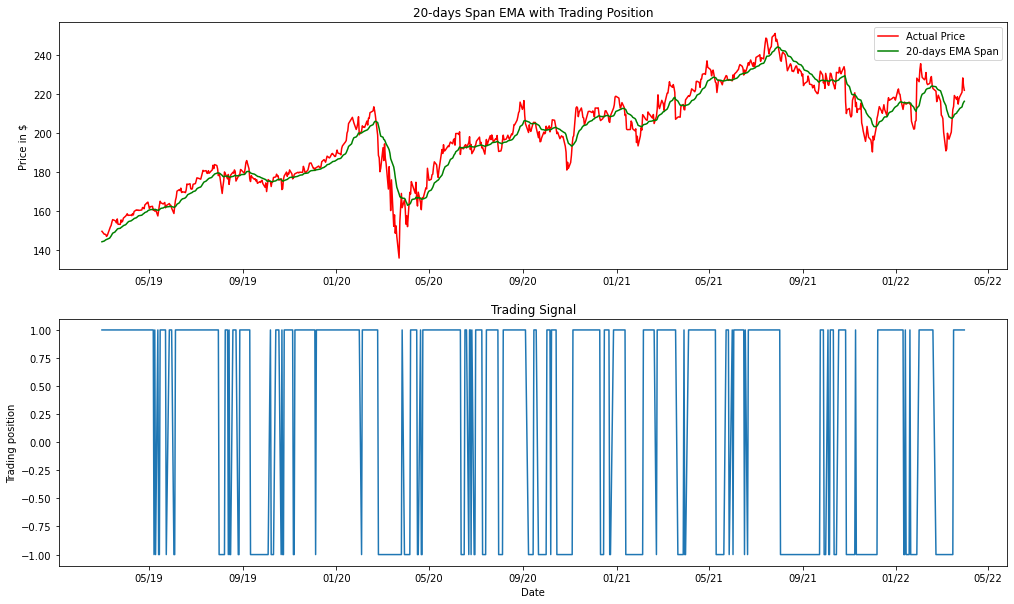

In [247]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17,10))

ax1.plot(visa_new.loc[start_date:end_date, :].index, visa_new.loc[start_date:end_date, 'Actual Close'], label='Actual Price', color = 'red')
ax1.plot(visa_new.loc[start_date:end_date, :].index, visa_new.loc[start_date:end_date, '20days EMA Close'], label = '20-days EMA Span', color = 'green')

ax1.set_title('20-days Span EMA with Trading Position')
ax1.set_ylabel('Price in $')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(visa_new.loc[start_date:end_date, :].index, visa_new.loc[start_date:end_date, 'Signal'], 
        label='Trading position')
ax2.set_title('Trading Signal')
ax2.set_xlabel('Date')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)
fig.savefig('plot3.png')

In [248]:
# Conclusions
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Metric", "Scores"]

x.add_row(["RMSE", 39])
x.add_row(["RSquared", 0.995])

print(x)

+----------+--------+
|  Metric  | Scores |
+----------+--------+
|   RMSE   |   39   |
| RSquared | 0.995  |
+----------+--------+


# Citation

1. https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
2. https://www.investopedia.com/terms/s/sma.asp
3. https://www.investopedia.com/terms/e/ema.asp